## SI 670 Applied Machine Learning, Week 3:  Regularization, Logistic Regression, and Evaluation (Due 10/03 11:59pm)

For this assignment, you will be exercising on questions related to linear regression, polynomial feature expansion, underfitting/overfitting, and cross-validation.

Each question is worth 20 points, for a total of 80 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file to the Canvas site - IMPORTANT: please name your submitted file si670-hw1-youruniqname.ipynb and be sure to put your name at the top of your notebook file.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.


### Put your name here: Huan Zhao

### Put your uniquename here: huanzhao

### Preliminary
In this assignment you will train several linear classifier models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud). Then you'll perform a grid search to find optimal parameters. 
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
# # run this cell if you are using Colab

# !rm -rf fraud_data.csv

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'fraud_data.csv': io.BytesIO(uploaded['fraud_data.csv'])}

# # upload 'fraud_data.csv'

In [2]:
# run this cell if you are using Jupyter
files = {'fraud_data.csv': 'fraud_data.csv'}

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

df = pd.read_csv(files['fraud_data.csv'])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 1 (20 points)

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

Then train a LogisticRegression classifier with C=1. What is the accuracy? What is the recall?

*This function should a return a tuple with four floats, i.e. `(dummy_accuracy, dummy_recall, lr_accuracy, lr_recall)`.*

In [4]:
def answer_one():
    # YOUR CODE HERE
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    from sklearn.linear_model import LogisticRegression

    
    clf = DummyClassifier()
    clf.fit(X_train, y_train)
    y_dummy_predictions = clf.predict(X_test)
    dummy_accuracy = clf.score(X_test, y_test)
    dummy_recall = recall_score(y_test, y_dummy_predictions)
    
    clf_lr = LogisticRegression(C=1)  
    clf_lr.fit(X_train, y_train)
    y_lr_predictions = clf_lr.predict(X_test)
    lr_accuracy = clf_lr.score(X_test, y_test)
    lr_recall = recall_score(y_test, y_lr_predictions)
    
    
    return dummy_accuracy, dummy_recall, lr_accuracy, lr_recall

answer_one()

C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9666297935103245, 0.025, 0.9964970501474927, 0.7875)

### Question 2 (20 points)

Fit the LogisticRegression with `C` varying from `[[0.1, 1, 10]` and report the accuracy, precision, recall, and F1 scores for each choice of `C`.

*This function should a return a tuple with four lists, i.e. `(accuracy_list, precision_list, recall_list, f1_list)`, and each list should contain 3 numbers.*

In [5]:
def answer_two():

    # YOUR CODE HERE
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.linear_model import LogisticRegression
    
    # Accuracy = TP + TN / (TP + TN + FP + FN)
    # Precision = TP / (TP + FP)
    # Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
    # F1 = 2 * Precision * Recall / (Precision + Recall) 
    
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    
    for C in [0.1, 1, 10]:
        model = LogisticRegression(C=C)
        model.fit(X_train, y_train)
        y_predicted = model.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, y_predicted))
        precision_list.append(precision_score(y_test, y_predicted))
        recall_list.append(recall_score(y_test, y_predicted))
        f1_list.append(f1_score(y_test, y_predicted))
        
        
    return accuracy_list, precision_list, recall_list, f1_list

answer_two()

C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


([0.9963126843657817, 0.9964970501474927, 0.9966814159292036],
 [0.96875, 0.9692307692307692, 0.9696969696969697],
 [0.775, 0.7875, 0.8],
 [0.8611111111111113, 0.8689655172413793, 0.8767123287671234])

### Question 3 (20 points)

Train a logistic regression classifier with `C=10` using X_train and y_train.

For the logistic regression classifier, create (1) a precision-recall curve and (2) a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the ROC curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall_at_p75, tpr_at_fpr16)`.*
*You should also includce code to generate the precision/recall and ROC curves above*

C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Huan Zhao\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


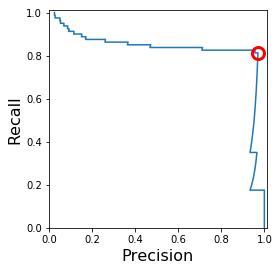

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
    
clf = LogisticRegression(C=10)  
clf.fit(X_train, y_train)
    
y_scores_lr = clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

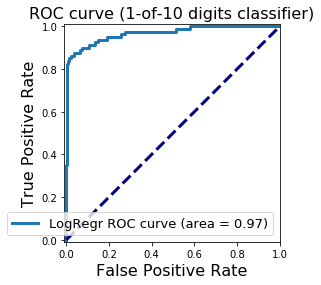

In [7]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [8]:
def answer_three():

    # YOUR CODE HERE
    recall_at_p75 = 0.83
    tpr_at_fpr16 = 0.94
     
    return recall_at_p75, tpr_at_fpr16

answer_three()

(0.83, 0.94)

## Question 4 (20 Points)

Suppose you have trained a classifier distinguishing Benign vs Malignant cancers. And the confusion matrix of your classifier is given below.

|      	| Predicted: Benign 	| Predicted: Malignant 	|
|:----:	|----	|----	|
| Actual: Benign 	|    10000	|   100 	|
| Actual: Malignant  	|    200	|   10 	|

### Question (a) (10 points) 
If we assume Benign is the positive class and Malignant is the negative class, what are the precision and recall for Benign? If we assume Malignant is the positive class and Benign is the negative class, what are the precision and recall for Malignant?

*This function should return a tuple of four float numbers: `(precision_benign, recall_genign, precision_maligant, recall_maligant)`. You can calculate these scores either by coding or by hands.*

In [9]:
def answer_four_a():
    
    # Coding or manually calculating the precision and recall scores here. 
    TP = 10000
    TN = 200
    FP = 100
    FN = 10
    
    precision_benign = TP / (TP + TN)
    recall_genign = TP / (TP + FP)
    precision_maligant = FN / (FN + FP)
    recall_maligant = FN / (FN + TN)

    return precision_benign, recall_genign, precision_maligant, recall_maligant

answer_four_a()

(0.9803921568627451,
 0.9900990099009901,
 0.09090909090909091,
 0.047619047619047616)

### Question (b) (10 points) 
If you have another classifier with the following confusion matrix, which classifier do you prefer and why? (Hint: calculate the precision and recall scores for this classifier and compare with the previous classifier.)

|      	| Predicted: Benign 	| Predicted: Malignant 	|
|:----:	|----	|----	|
| Actual: Benign 	|    7000	|   3100 	|
| Actual: Malignant  	|    30	|   180 	|

In [10]:
def answer_four_b():
    
    TP = 7000
    TN = 30
    FP = 3100
    FN = 180
    
    precision_benign = TP / (TP + TN)
    recall_genign = TP / (TP + FP)
    precision_maligant = FN / (FN + FP)
    recall_maligant = FN / (FN + TN)
  
    return precision_benign, recall_genign, precision_maligant, recall_maligant

answer_four_b()

(0.9957325746799431,
 0.693069306930693,
 0.054878048780487805,
 0.8571428571428571)

#### Answer to quesiton 4 (b)

I prefer the classifier in question (b). Because the precision_benign in question (b) is higher.